# Import and format BTC price data

In [2]:
import pandas as pd

btc = pd.read_csv("data/BTC-USD-Sep-Dec-2021.csv")
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,39139399125
1,2021-09-02,48807.847656,50343.421875,48652.320313,49327.722656,49327.722656,39508070319
2,2021-09-03,49288.250000,50982.273438,48386.085938,50025.375000,50025.375000,43206179619
3,2021-09-04,50009.324219,50545.582031,49548.781250,49944.625000,49944.625000,37471327794
4,2021-09-05,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319
...,...,...,...,...,...,...,...
117,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758
118,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
119,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
120,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018


In [12]:
import numpy as np

avgs = []
for i in range(122):
    avgs.append((btc.iloc[i]["High"] + btc.iloc[i]["Low"] + btc.iloc[i]["Open"] + btc.iloc[i]["Close"])  / 4)

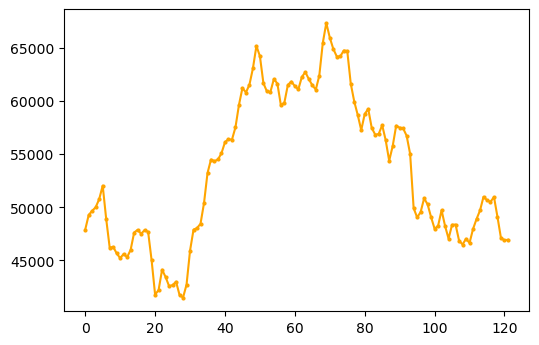

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=100)

plt.plot(avgs, marker='o', markersize=2, color='orange')

plt.show()

### Adding API sentiment-tagged data

In [8]:
api = pd.read_csv("data/api_tagged.csv").drop(columns=["Unnamed: 0"])
api

,Tweet,Date,Sentiment
0,current stats of delegatedonthate block find p...,2022-05-19,-0.130509
1,bbcworld for all those who be new to this work...,2022-05-19,0.209407
2,smilingpunks floor price no gas fee polygon b...,2022-05-19,0.391721
3,i be claim my free lightning sat from bitcoine...,2022-05-19,0.258565
4,washingtonpost for all those who be new to thi...,2022-05-19,0.209407
...,...,...,...
499995,natashacryptous luna lunaterra lunaburn will h...,2022-05-22,0.322164
499996,cryptocurrencies bitcoin litecoin and ethereum...,2022-05-22,0.197086
499997,cryptocurrencies bitcoin litecoin and ethereum...,2022-05-22,0.197086
499998,this be a big opportunity.made by a very profe...,2022-05-22,0.682156


In [10]:
import datetime as dt

api["Date"] = pd.to_datetime(api["Date"], format="%Y-%m-%d")

sents = []
for i in range(7):
    t = pd.Timestamp(2022, 5, 17)
    x = api[api["Date"] == t + dt.timedelta(days=i)]
    sents.append(x["Sentiment"].mean())
    
sents

[0.23395597210996708,
 0.20257452385564317,
 0.20129841165122883,
 0.2083559032236821,
 0.21630058694621587,
 0.24328242945952186,
 0.23710920885726225]

In [11]:
dates = np.sort(api["Date"].astype(str).unique())

# Combine figures into one dataframe
df = pd.DataFrame({"Date": dates, "BTC Price": avgs, "Sentiment": sents})

# Price line
fig, ax1 = plt.subplots()
ax1.plot(df.index, df['BTC Price'], color="orange",  marker=".", ms=6)

# Sentiment line
ax2 = ax1.twinx()
ax2.plot(df.index, df['Sentiment'], color="blue", marker=".", ms=6)

# Formatting
plt.title("BTC Price vs Twitter Sentiment")

ax1.set_ylabel('BTC Price ($)', color="orange")
ax2.set_ylabel('Sentiment (-1 to 1)', color="blue")

ax1.set_xlabel('Date')

ax1.xaxis.set_ticks(range(7))
ax1.set_xticklabels(dates, rotation=45)

fig.set_dpi(100)


plt.show()

ValueError: All arrays must be of the same length

Seems mildly correlated?